
1. Get the numerical variables from our dataset.
2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.
3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [1]:
import pandas as pd
import numpy as np


import warnings
warnings.filterwarnings('ignore')


import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns


import math

In [2]:
data = pd.read_csv(r"C:\Users\Pedro Gomes\Desktop\Filipa_Ironhack\Labs\Python\lab-random-variable-distributions\files_for_lab\we_fn_use_c_marketing_customer_value_analysis.csv")
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [3]:
#get all the numerical data
numerical = data.select_dtypes(include = np.number)
numerical

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


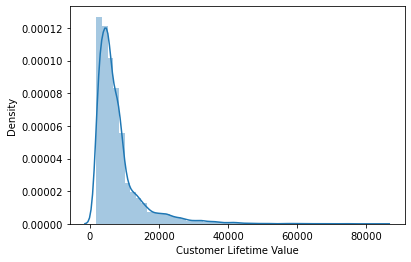

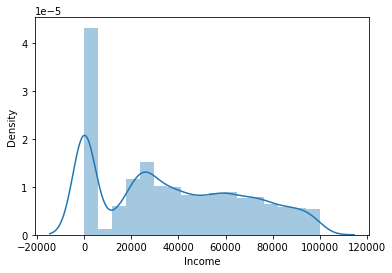

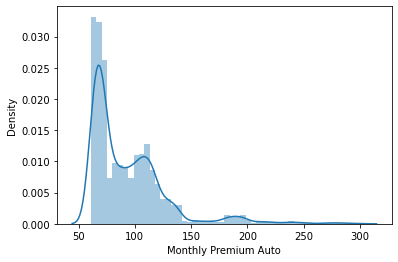

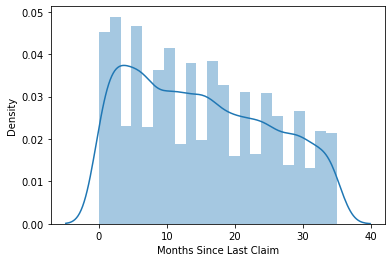

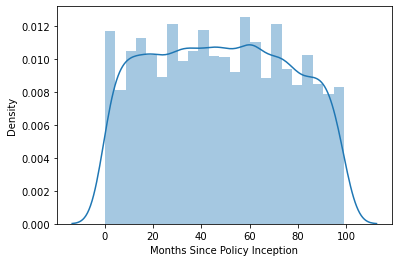

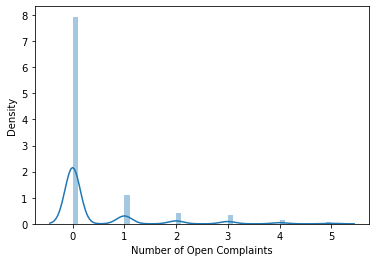

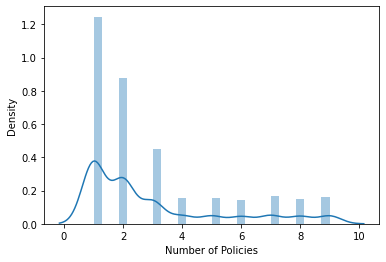

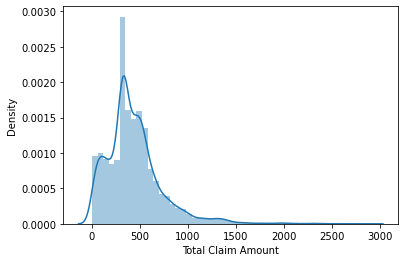

In [7]:
#Plot all the variables to check wich ones are normalized and wich ones have a exponential distribution
# nun of the variables have a normal distribution, the only only one that has a an aproximately bell centered shape is the monthly premium auto

for col in numerical.columns:
    sns.distplot(numerical[col])
    plt.show()

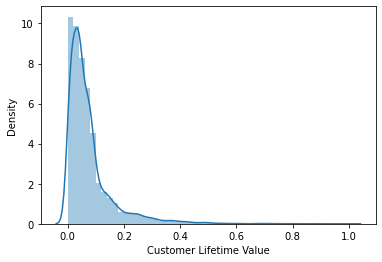

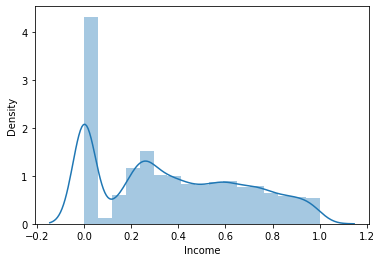

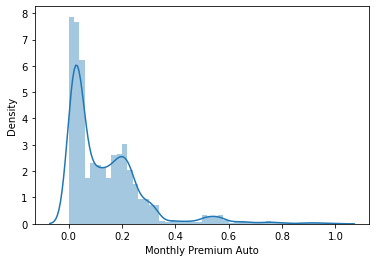

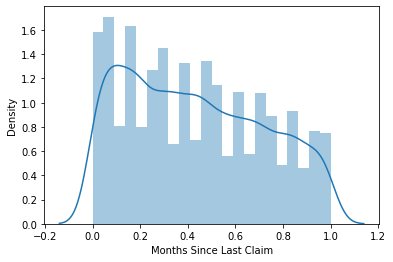

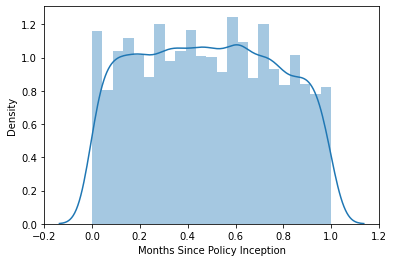

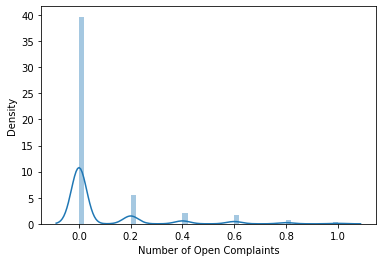

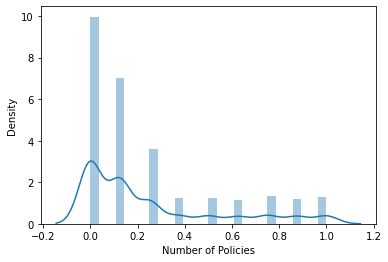

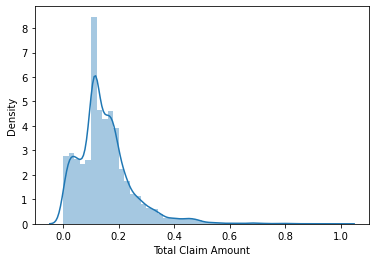

In [16]:
# then normalize the data to see if the distribution changed 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(numerical)
normalized_data = pd.DataFrame(normalized_data, columns=numerical.columns)

# plot the normalized data

for col in normalized_data.columns:
    sns.distplot(normalized_data[col])
    plt.show()
    


In [ ]:
'''Normalizing the data doesnt change its distribution all the variables are exponentialy distributed'''

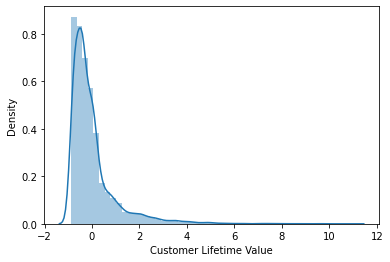

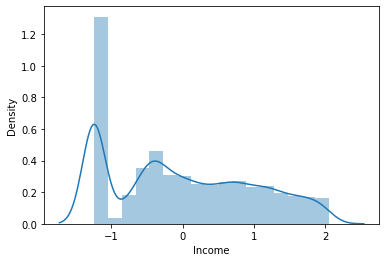

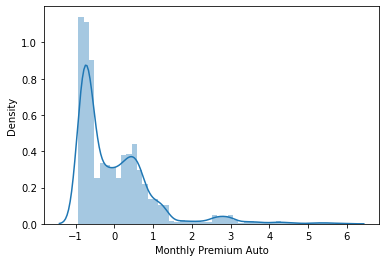

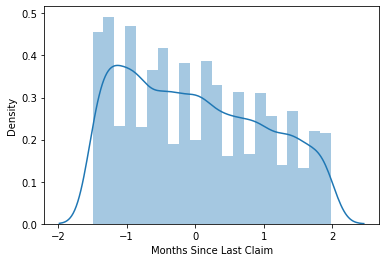

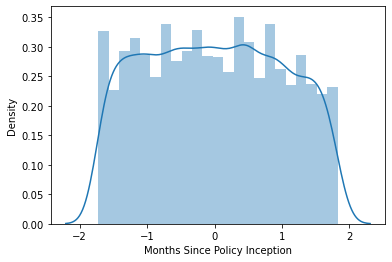

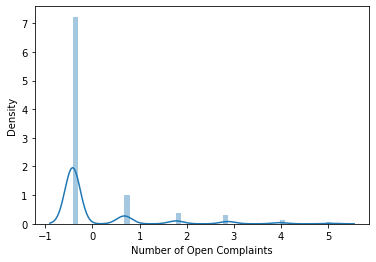

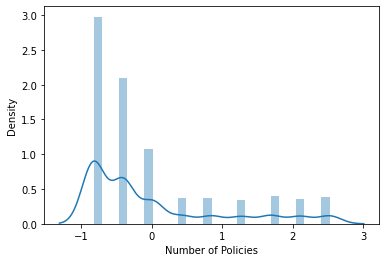

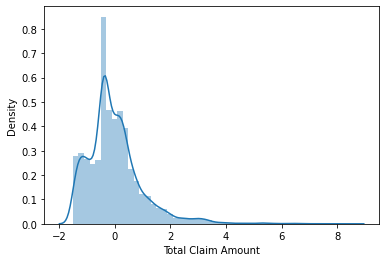

In [18]:
#Lets try Standardizing the data 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized_data = scaler.fit_transform(numerical)
standardized_data = pd.DataFrame(standardized_data, columns=numerical.columns)
standardized_data

#plot the standardized data 
for col in standardized_data.columns:
    sns.distplot(standardized_data[col])
    plt.show()


In [ ]:
'''Standertizing the data doesn't change its distribution either, all the variables are exponentialy distributed'''

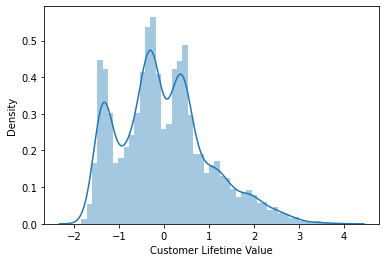

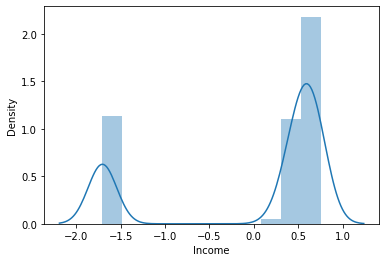

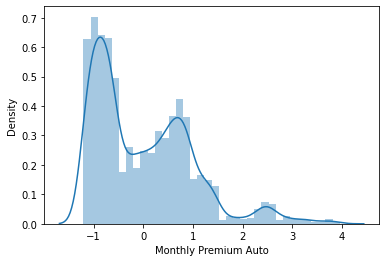

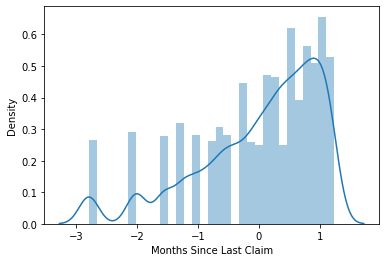

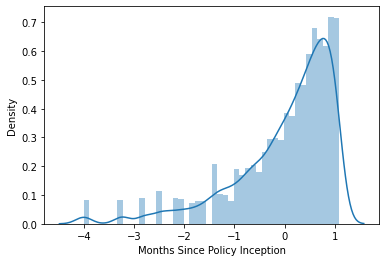

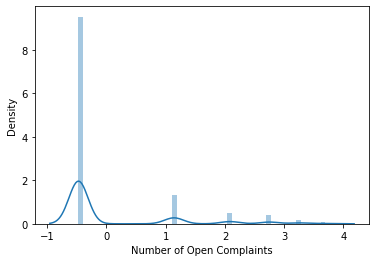

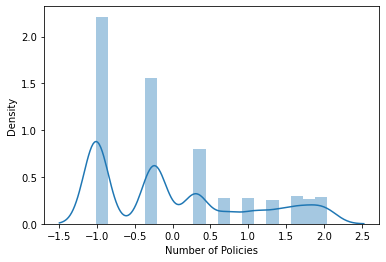

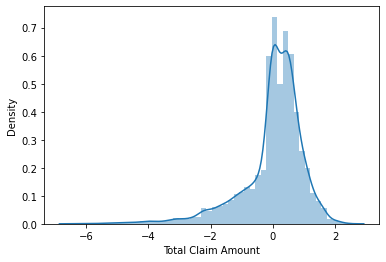

In [19]:
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import expon

def replace_negatives(data_num): 
    for col in data_num.columns:
        if len(data_num[data_num[col] <= 0]) >1:
            data_num[col] = np.where(data_num[col] <0, 0, data_num[col])
            data_num[col] =data_num[col].replace(0,data_num[col].mea
log_transformed = np.log1p(numerical)
log_data = scaler.fit_transform(log_transformed)
log_data = pd.DataFrame(log_data, columns = log_transformed.columns)

#plot the data to see if the distribution changed
for col in log_data.columns:
    sns.distplot(log_data[col])
    plt.show()

In [ ]:
'''with the log-tranform, the data didnt change to a normal distribution but they did change mostly to exponencial, custommer lifetime value almost got a normal distribution thought '''

In [25]:
from scipy import stats 
def replace_negatives(data_num): 
    for col in data_num.columns:
        if len(data_num[data_num[col] <= 0]) >1:
            data_num[col] = np.where(data_num[col] <0, 0, data_num[col])
            data_num[col] =data_num[col].replace(0,data_num[col].mean())
    for col in data_num.columns:
        arr, lmbda = stats.boxcox(data_num[col]) 
        data_num[col] = arr
    return data_num


In [26]:
replace_negatives(numerical)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2.703839,42.114983,0.685347,10.809132,3.017301,-5.941376,0.000000,33.035752
1,2.754926,38.346277,0.685871,5.783269,18.770387,-5.941376,1.424359,56.357614
2,2.780772,40.735368,0.686039,7.311427,17.380225,-5.941376,0.607328,40.071789
3,2.759125,38.346277,0.686018,7.311427,26.144855,-5.941376,1.363462,38.763252
4,2.704995,39.734641,0.685461,5.448624,19.451130,-5.941376,0.000000,19.560154
...,...,...,...,...,...,...,...,...
9129,2.801170,44.579684,0.685461,7.311427,33.067968,-5.941376,0.607328,23.588905
9130,2.711030,33.627127,0.685606,6.106927,13.703207,-5.941376,0.000000,32.792951
9131,2.762062,38.346277,0.685725,4.363742,17.026248,0.311563,0.607328,47.263726
9132,2.758397,33.751319,0.685898,11.248499,1.667661,-5.941376,0.893486,44.225147


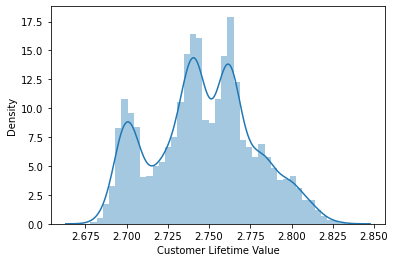

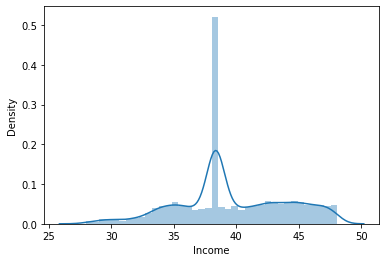

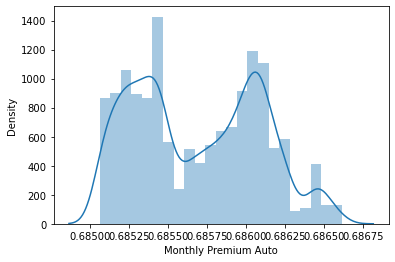

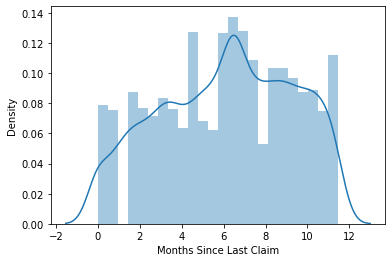

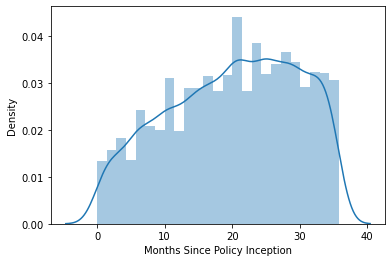

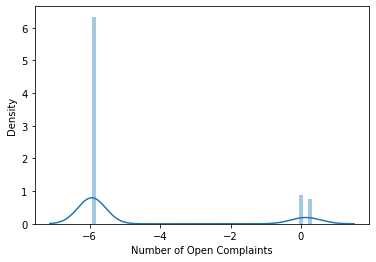

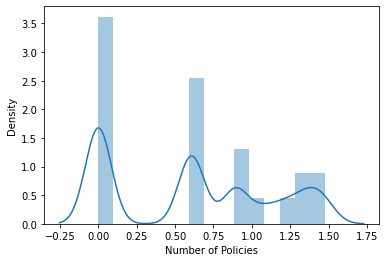

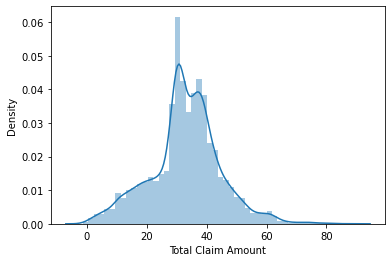

In [27]:
for col in numerical.columns:
    sns.distplot(numerical[col])
    plt.show()